In [14]:
import trendy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [15]:
print(np.version.version)

1.16.2


In [7]:
# Read sample data from csv
aapl_full = pd.read_csv("AAPL_data_full.csv",index_col='Date')
aapl_close = aapl_full[['Adj Close']].copy()
aapl_close.head()

,Adj Close
Date,
2010-01-04,20.473503
2010-01-05,20.508902
2010-01-06,20.182680
2010-01-07,20.145369
2010-01-08,20.279305


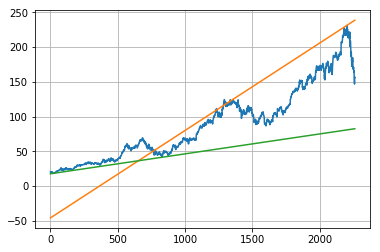

(            Data    Max Line   Min Line
 0      20.473503  -45.792941  17.742489
 1      20.508902  -45.667122  17.771147
 2      20.182680  -45.541304  17.799805
 3      20.145369  -45.415485  17.828462
 4      20.279305  -45.289666  17.857120
 5      20.100410  -45.163848  17.885778
 6      19.871763  -45.038029  17.914436
 7      20.152065  -44.912210  17.943094
 8      20.035355  -44.786392  17.971752
 9      19.700523  -44.660573  18.000409
 10     20.572037  -44.534754  18.029067
 11     20.255390  -44.408935  18.057725
 12     19.905249  -44.283117  18.086383
 13     18.917973  -44.157298  18.115041
 14     19.426920  -44.031479  18.143699
 15     19.701479  -43.905661  18.172356
 16     19.887072  -43.779842  18.201014
 17     19.065300  -43.654023  18.229672
 18     18.373636  -43.528205  18.258330
 19     18.629066  -43.402386  18.286988
 20     18.737165  -43.276567  18.315646
 21     19.059557  -43.150749  18.344303
 22     18.372683  -43.024930  18.372961
 23     18.69890

In [16]:
# Generate general support/resistance trendlines and show the chart
# window < 1 is considered a fraction of the length of the data set
trendy.gentrends(aapl_close['Adj Close'], window = 1.0/3, charts = True)

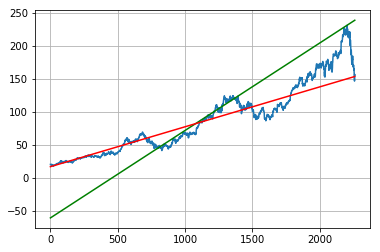

(array([1115., 2203.]),
 array([ 87.08700562, 231.26309204]),
 array([  22., 1141.]),
 array([18.37268257, 86.01515961]))

In [17]:
# Generate a series of support/resistance lines by segmenting the price history
trendy.segtrends(aapl_close['Adj Close'], segments = 2, charts = True)  # equivalent to gentrends with window of 1/2

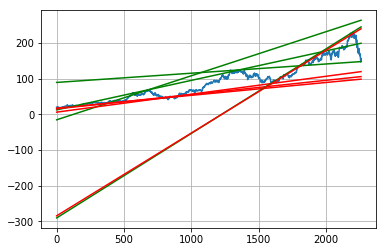

(array([ 450.,  684., 1355., 1801., 2203.]),
 array([ 40.37110519,  69.23925018, 124.61601257, 136.13034058,
        231.26309204]),
 array([  22.,  479.,  904., 1600., 1810.]),
 array([ 18.37268257,  34.78132629,  51.74651718,  86.67816162,
        135.35127258]))

In [10]:
# Generate a series of support/resistance lines by segmenting the price history
trendy.segtrends(aapl_close['Adj Close'], segments = 5, charts = True)  # plots several S/R lines

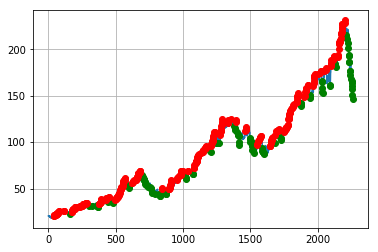

array([ 0.,  0.,  0., ..., -1.,  0.,  0.])

In [19]:
# Iteratively generate trading signals based on maxima/minima in given window
trendy.iterlines(aapl_close['Adj Close'], window = 30, charts = True)  # buy at green dots, sell at red dots

In [37]:
def minitrends_rewrite(x, window=20, charts=True):
    """
    Turn minitrends to iterative process more easily adaptable to
    implementation in simple trading systems; allows backtesting functionality.

    :param x: One-dimensional data set
    :param window: How long the trendlines should be. If window < 1, then it
                   will be taken as a percentage of the size of the data
    :param charts: Boolean value saying whether to print chart to screen
    """
    y = np.array(x)

    if window < 1:  # if window is given as fraction of data length
        window = float(window)
        window = int(window * len(y))
    x = np.arange(0, len(y))
    dy = y[window:] - y[:-window]
    crit = dy[:-1] * dy[1:] < 0
    
    print("x:", len(x))
    print("dy:", len(dy))
#     # Find whether max's or min's
#     maxi = ((y[x[crit]] - y[x[crit] + window] > 0) & \
#            (y[x[crit]] - y[x[crit] - window] > 0) * 1)
#     mini = ((y[x[crit]] - y[x[crit] + window] < 0) & \
#            (y[x[crit]] - y[x[crit] - window] < 0) * 1)
#     maxi = maxi.astype(float)
#     mini = mini.astype(float)
#     maxi[maxi == 0] = np.nan
#     mini[mini == 0] = np.nan
#     xmax = x[crit] * maxi
#     xmax = xmax[~np.isnan(xmax)]
#     xmax = xmax.astype(int)
#     xmin = x[crit] * mini
#     xmin = xmin[~np.isnan(xmin)]
#     xmin = xmin.astype(int)

#     # See if better max or min in region
#     yMax = np.array([])
#     xMax = np.array([])
#     for i in xmax:
#         indx = np.where(xmax == i)[0][0] + 1
#         try:
#             Y = y[i:xmax[indx]]
#             yMax = np.append(yMax, Y.max())
#             xMax = np.append(xMax, np.where(y == yMax[-1])[0][0])
#         except:
#             pass
#     yMin = np.array([])
#     xMin = np.array([])
#     for i in xmin:
#         indx = np.where(xmin == i)[0][0] + 1
#         try:
#             Y = y[i:xmin[indx]]
#             yMin = np.append(yMin, Y.min())
#             xMin = np.append(xMin, np.where(y == yMin[-1])[0][0])
#         except:
#             pass
#     if y[-1] > yMax[-1]:
#         yMax = np.append(yMax, y[-1])
#         xMax = np.append(xMax, x[-1])
#     if y[0] not in yMax:
#         yMax = np.insert(yMax, 0, y[0])
#         xMax = np.insert(xMax, 0, x[0])
#     if y[-1] < yMin[-1]:
#         yMin = np.append(yMin, y[-1])
#         xMin = np.append(xMin, x[-1])
#     if y[0] not in yMin:
#         yMin = np.insert(yMin, 0, y[0])
#         xMin = np.insert(xMin, 0, x[0])

#     # Plot results if desired
#     if charts is True:
#         plot(x, y)
#         plot(xMax, yMax, '-o')
#         plot(xMin, yMin, '-o')
#         grid(True)
#         show()
#     # Return arrays of critical points
#     return xMax, yMax, xMin, yMin

In [38]:
# Generate smaller support/resistance trendlines to frame price over smaller periods
# trendy.minitrends(aapl_close['Adj Close'], window = 30, charts = True)
minitrends_rewrite(aapl_close['Adj Close'], window = 30, charts = True)

x: 2262
dy: 2232
